https://www.w3schools.com/python/numpy/numpy_random_seaborn.asp

https://seaborn.pydata.org/tutorial.html

https://seaborn.pydata.org/examples/index.html

Seaborn é uma biblioteca que usa Matplotlib para traçar gráficos. Ele será usado para visualizar distribuições aleatórias.

In [2]:
!pip install -q seaborn

In [3]:
!pip install -q random

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


In [4]:
import seaborn, random, numpy as np, pandas as pd, matplotlib as mat, matplotlib.pyplot as plt, warnings

In [5]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
# Lista de datasets no pacote seaborn
seaborn.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
# Dados de exemplo
dados = seaborn.load_dataset('tips')
dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Dataset de jantares e gorjetas

* total_bill: total da conta
* tip: valor pago na gorgeta
* sex: sexo da pessoa que pagou a onta
* smoker: existência de fumantes à mesa
* day: dia da semana
* time: refeição; horário da refeição
* size: número de pessoas à mesa

## Jointplot

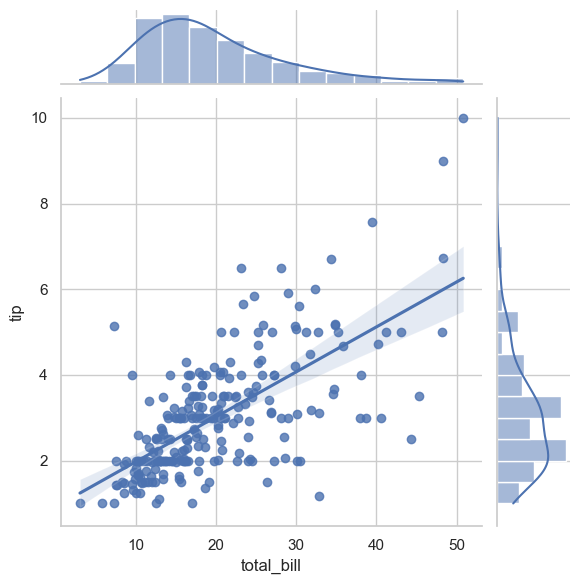

In [11]:
seaborn.jointplot(data = dados, x = "total_bill", y = "tip", kind = 'reg')

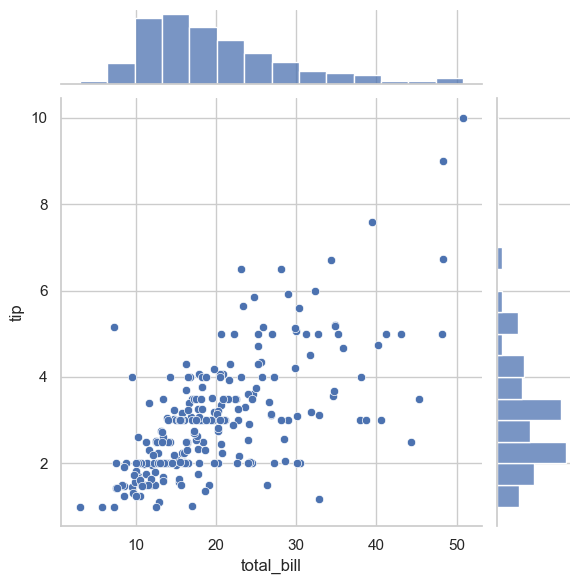

In [12]:
seaborn.jointplot(data = dados, x = "total_bill", y = "tip", kind = 'scatter')

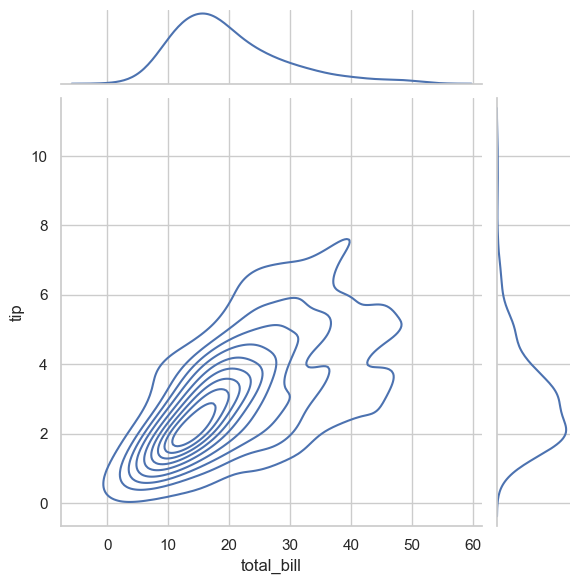

In [13]:
seaborn.jointplot(data = dados, x = "total_bill", y = "tip", kind = 'kde')

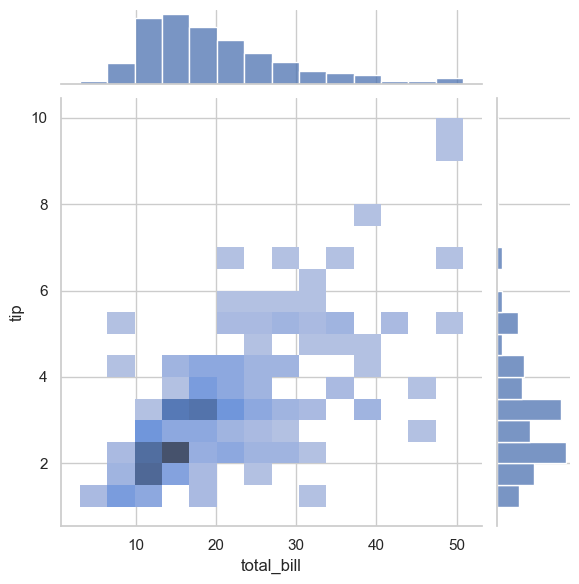

In [14]:
seaborn.jointplot(data = dados, x = "total_bill", y = "tip", kind = 'hist')

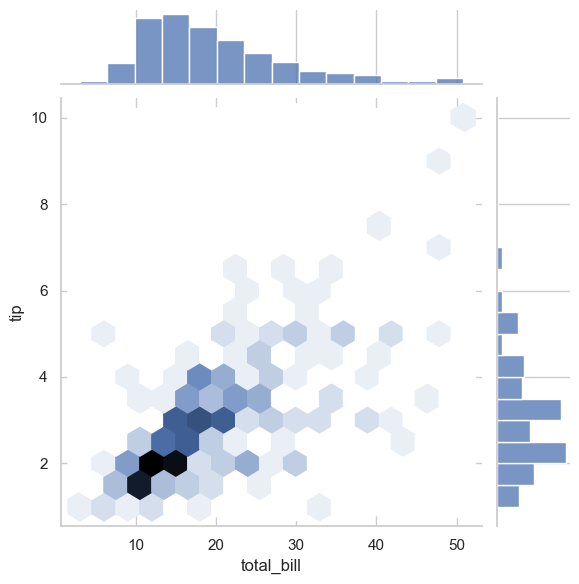

In [15]:
seaborn.jointplot(data = dados, x = "total_bill", y = "tip", kind = 'hex')

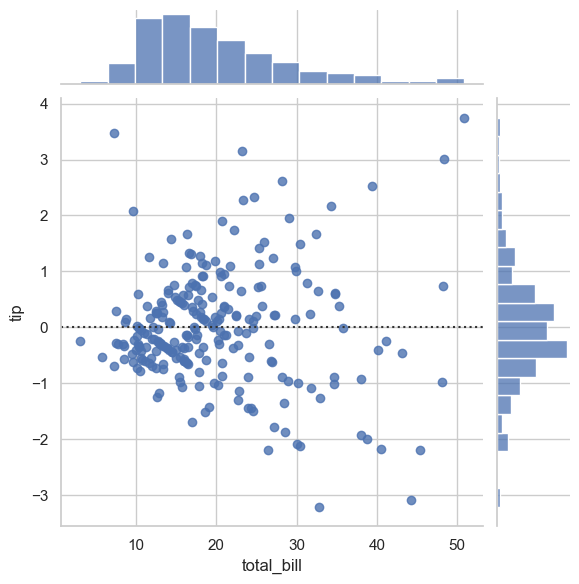

In [16]:
seaborn.jointplot(data = dados, x = "total_bill", y = "tip", kind = 'resid')

## lmplot

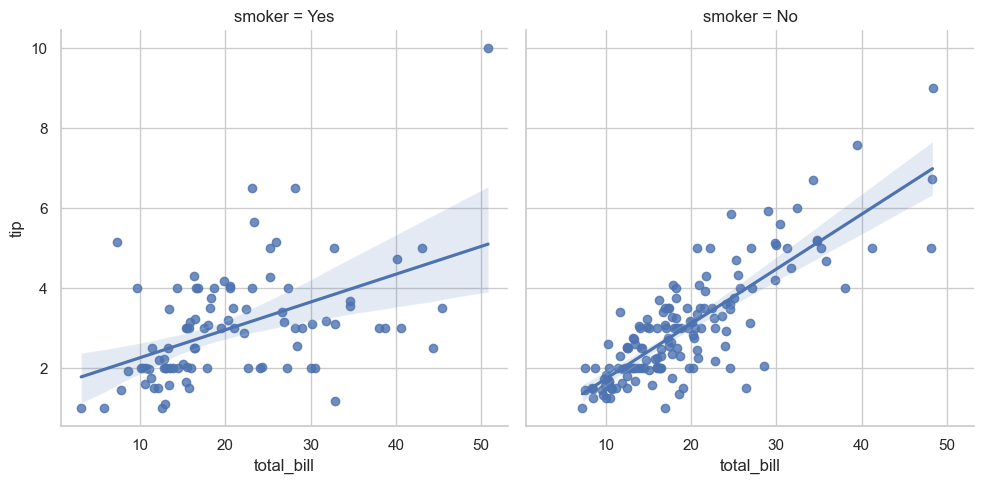

In [30]:
seaborn.lmplot(data = dados, x = "total_bill", y = "tip", col = 'smoker')

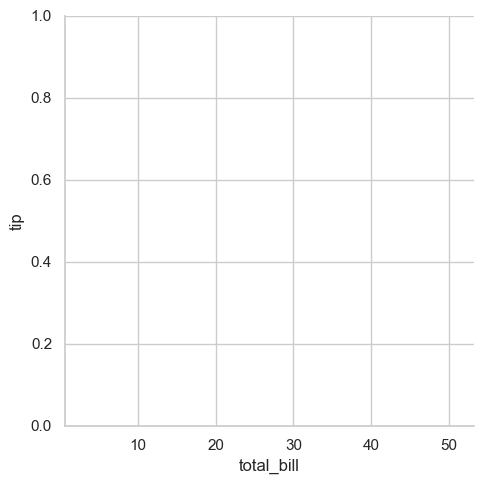

In [36]:
seaborn.lmplot(data = dados, x = "total_bill", y = "tip", legend = True, fit_reg=False,scatter=False)

## kdeplot

<Axes: xlabel='total_bill', ylabel='Density'>

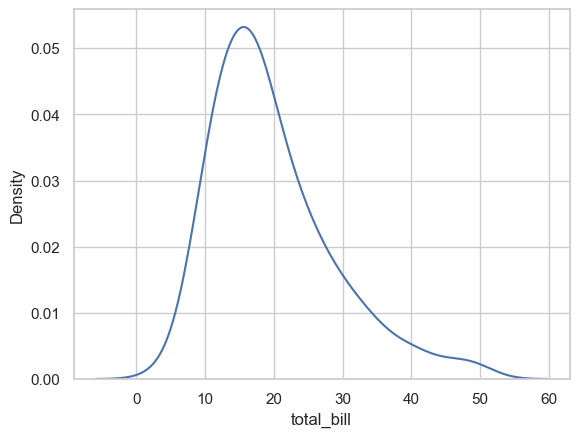

In [38]:
seaborn.kdeplot(dados['total_bill'])

## distplot - distribuição e histograma

<Axes: xlabel='total_bill', ylabel='Density'>

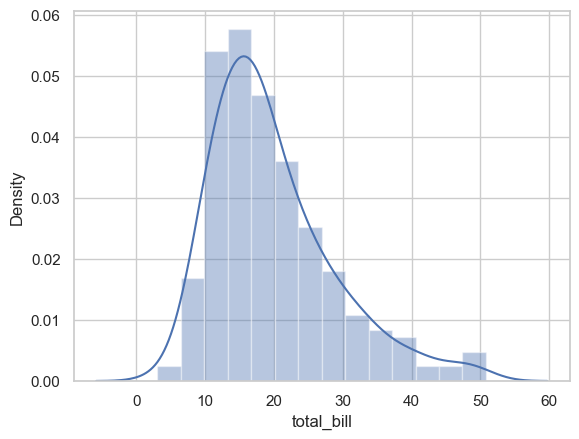

In [40]:
seaborn.distplot(dados['total_bill'])

## Rugplot

<Axes: xlabel='total_bill'>

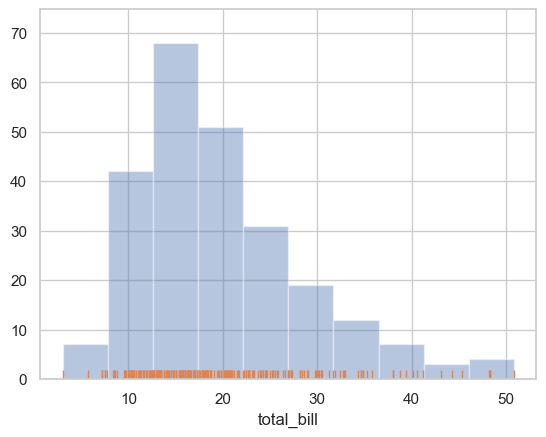

In [46]:
# Acrescentando rugas a um plot do pyplot

plt.hist(dados['total_bill'], alpha = 0.4)

seaborn.rugplot(dados['total_bill'])

## boxplot

<Axes: xlabel='day', ylabel='total_bill'>

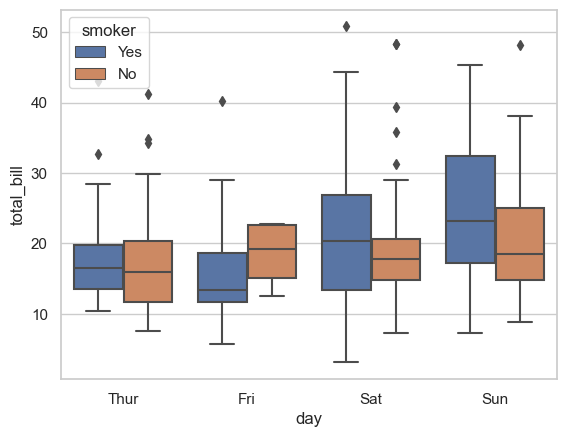

In [49]:
seaborn.boxplot(x = "day", y = "total_bill", hue = "smoker", data = dados)

## catplot

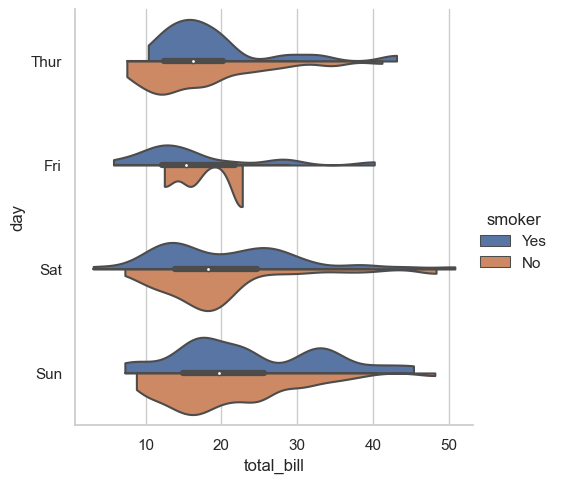

In [51]:
seaborn.catplot(
    data=dados, x="total_bill", y="day", hue="smoker",
    kind="violin", bw=.25, cut=0, split=True,
)

# clustermap

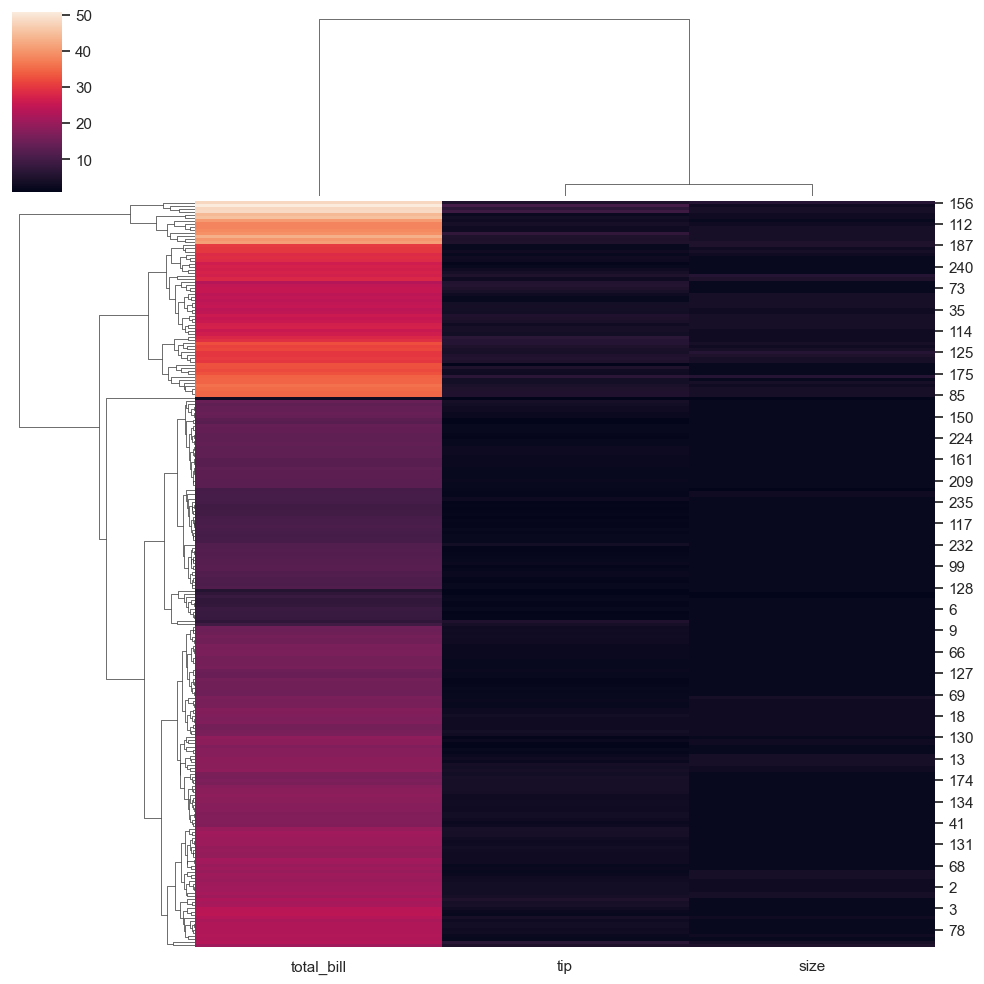

In [53]:
seaborn.clustermap(dados[["total_bill","tip","size"]])

## Temas

<Axes: xlabel='day', ylabel='total_bill'>

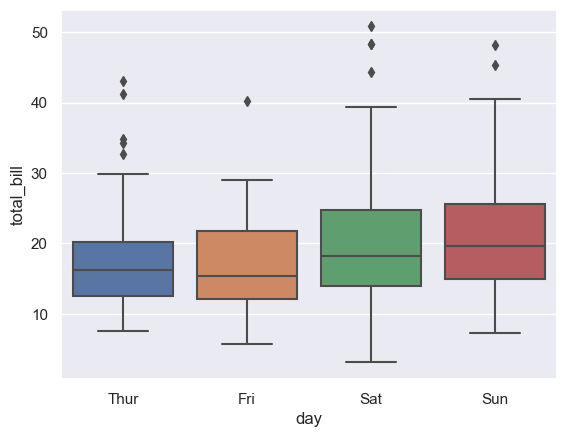

In [19]:
seaborn.set_theme(style = "darkgrid")
seaborn.boxplot(x = "day", y = "total_bill", data = dados)

<Axes: xlabel='day', ylabel='total_bill'>

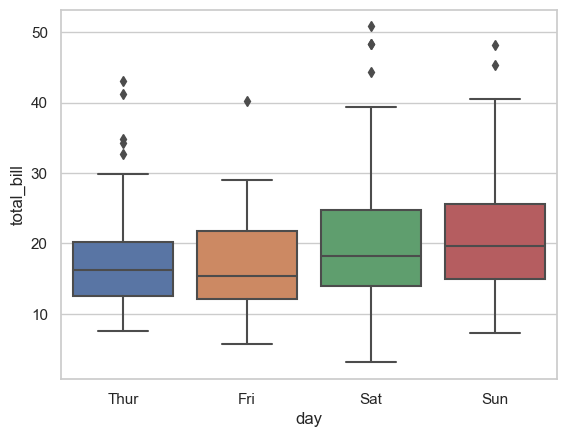

In [29]:
seaborn.set_theme(style = "whitegrid")
seaborn.boxplot(x = "day", y = "total_bill", data = dados)

<Axes: xlabel='day', ylabel='total_bill'>

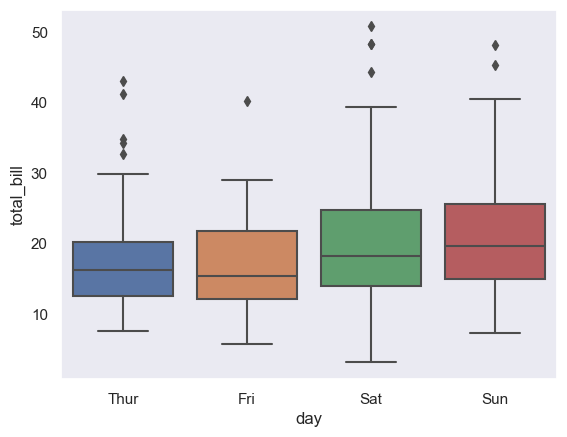

In [21]:
seaborn.set_theme(style = "dark")
seaborn.boxplot(x = "day", y = "total_bill", data = dados)

<Axes: xlabel='day', ylabel='total_bill'>

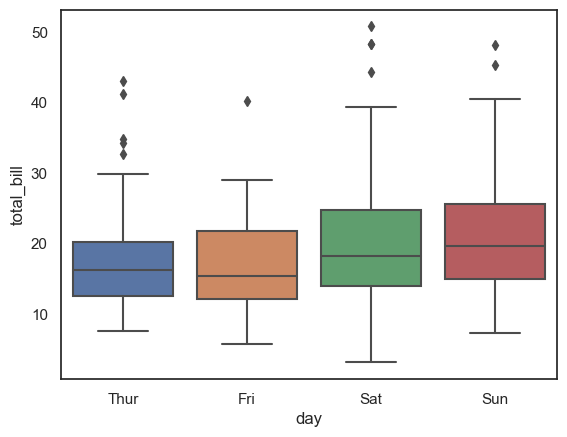

In [22]:
seaborn.set_theme(style = "white")
seaborn.boxplot(x = "day", y = "total_bill", data = dados)

<Axes: xlabel='day', ylabel='total_bill'>

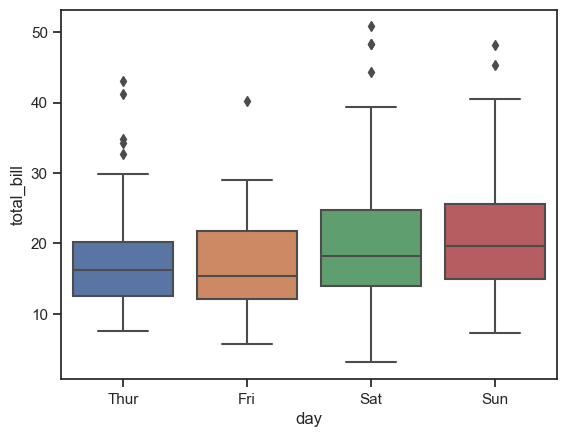

In [23]:
seaborn.set_theme(style = "ticks")
seaborn.boxplot(x = "day", y = "total_bill", data = dados)

Lista de customizações

In [26]:
# Dicionário com os padrões atuais
seaborn.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

<Axes: xlabel='day', ylabel='total_bill'>

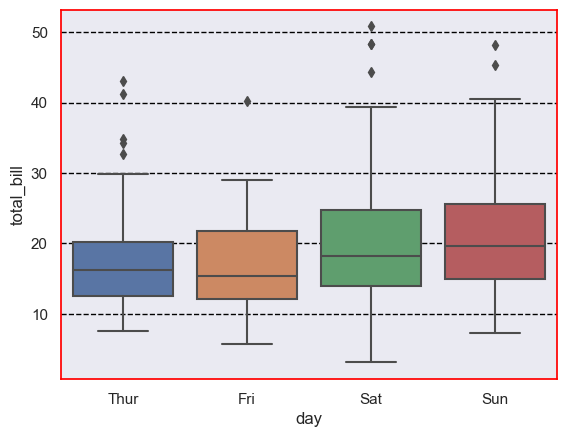

In [27]:
custom = {"axes.edgecolor": "red", "grid.linestyle": "dashed", "grid.color": "black"}
seaborn.set_style("darkgrid", rc = custom)

seaborn.boxplot(x = "day", y = "total_bill", data = dados)

# Exemplo de Análise

In [71]:
# Dados

np.random.seed(42)

n = 1000

pct_smokers = 0.2

    # Variáveis

# Cria um array com n valores aleatórios, de 0 a 1, então os converte para bool de acordo com o pct_smoker (20%)
flag = np.random.randn(n) < pct_smokers

idade = np.random.normal(40,10,n)
altura = np.random.normal(170,10,n)
peso = np.random.normal(70,10,n)

dados = pd.DataFrame({'idade':idade,'altura':altura,'peso':peso,'flag':flag})

# Convertendo bool em categórico usando .map
dados['flag_fumante'] = dados['flag'].map({True:'Fumante',False:'Não Fumante'})

In [72]:
dados.shape

(1000, 5)

In [73]:
dados.head(8)

,idade,altura,peso,flag,flag_fumante
0,53.993554,163.248217,50.921924,False,Não Fumante
1,49.246337,168.554813,61.396150,True,Fumante
2,40.596304,162.075801,65.863945,False,Não Fumante
3,33.530632,166.920385,88.876877,False,Não Fumante
4,46.982233,151.063853,75.565531,True,Fumante
5,43.934854,172.132937,56.645184,True,Fumante
6,48.951932,170.012055,74.860363,False,Não Fumante
7,46.351718,161.829114,54.526960,False,Não Fumante


In [74]:
# estilo
seaborn.set(style = "ticks")

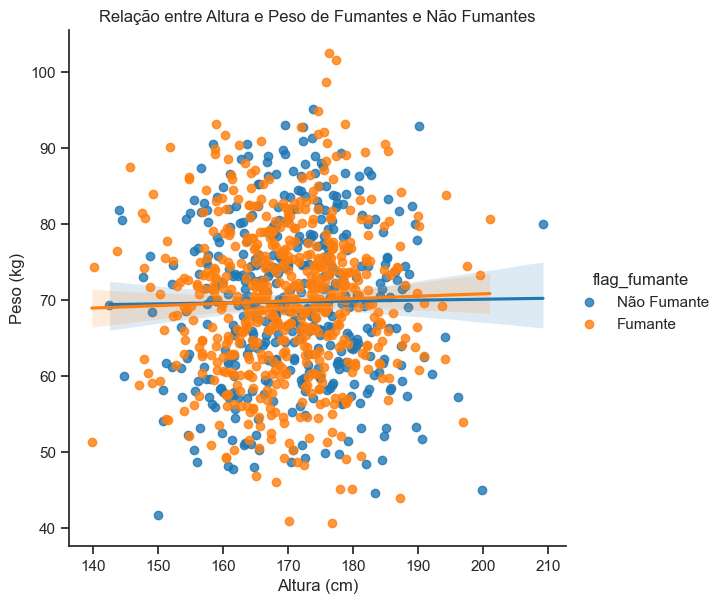

In [78]:
# lmplot

seaborn.lmplot(data = dados,
               x = 'altura',
               y = 'peso',
               hue = 'flag_fumante',
               palette = ['tab:blue','tab:orange'],
               height = 6)

plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.title('Relação entre Altura e Peso de Fumantes e Não Fumantes')

# remove bordas
seaborn.despine()